In [ ]:
!pip install torch==1.4.0
!pip install torchvision==0.5.0
import torch
print(torch.__version__)

     |████████████████████████████████| 753.4MB 21kB/s 
ERROR: torchvision 0.6.0+cu101 has requirement torch==1.5.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
     |████████████████████████████████| 4.0MB 9.4MB/s 
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101
1.4.0


In [ ]:
# Kaggle dependencies
!pip install kaggle
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 6.5MB/s 
     |████████████████████████████████| 5.3MB 28.3MB/s 
     |████████████████████████████████| 112kB 60.9MB/s 
     |████████████████████████████████| 112kB 63.5MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 


In [ ]:
# create a file for registraition
!mkdir /root/.kaggle

# My kaggle dependencies
!echo '{"username":"charlesquin","key":"da2e2b1213c53447a3344613262dfa45"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# Download data from kaggle
!kaggle competitions download -c cassava-disease

 99% 1.04G/1.04G [00:10<00:00, 116MB/s]
100% 1.04G/1.04G [00:10<00:00, 103MB/s]
 98% 761M/777M [00:09<00:00, 93.9MB/s]
100% 777M/777M [00:09<00:00, 82.4MB/s]
100% 513M/515M [00:09<00:00, 33.1MB/s]
100% 515M/515M [00:09<00:00, 58.1MB/s]
  0% 0.00/83.8k [00:00<?, ?B/s]
100% 83.8k/83.8k [00:00<00:00, 86.2MB/s]
  0% 0.00/645k [00:00<?, ?B/s]
100% 645k/645k [00:00<00:00, 184MB/s]


In [ ]:
#Unzip data before use them
!unzip test.zip
!unzip train.zip
!unzip extraimages.zip

Streaming output truncated to the last 5000 lines.
  inflating: extraimages/extra-image-12082.jpg  
  inflating: extraimages/extra-image-15935.jpg  
  inflating: extraimages/extra-image-5819.jpg  
  inflating: extraimages/extra-image-4050.jpg  
  inflating: extraimages/extra-image-2421.jpg  
  inflating: extraimages/extra-image-15262.jpg  
  inflating: extraimages/extra-image-6647.jpg  
  inflating: extraimages/extra-image-9574.jpg  
  inflating: extraimages/extra-image-7559.jpg  
  inflating: extraimages/extra-image-1896.jpg  
  inflating: extraimages/extra-image-9212.jpg  
  inflating: extraimages/extra-image-15504.jpg  
  inflating: extraimages/extra-image-5428.jpg  
  inflating: extraimages/extra-image-2347.jpg  
  inflating: extraimages/extra-image-3059.jpg  
  inflating: extraimages/extra-image-13175.jpg  
  inflating: extraimages/extra-image-4736.jpg  
  inflating: extraimages/extra-image-884.jpg  
  inflating: extraimages/extra-image-15510.jpg  
  inflating: extraimages/extra-i

In [ ]:
from fastai.vision import *


# **Application of fastai in mnist dataset**

# **Cassava chanlege on kaggle**

In [ ]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import torch
import fastai
from fastai.vision import *
from PIL import Image
import shutil


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
torch.cuda.is_available(), torch.backends.cudnn.enabled

(True, True)

In [ ]:
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

set_seed(42)

In [ ]:
# we define the transformer for the model
transform = vision.get_transforms(do_flip= True, flip_vert= True, max_rotate= 180, max_zoom=1.1,
                                  max_lighting = 0.2 , max_warp = 0.2, p_affine = 0.75, p_lighting = 0.7,
                                  xtra_tfms = zoom_crop(scale=(0.5, 1.5), do_rand=True))

## we get data
data = (ImageList.from_folder('/content/train')
          .split_by_rand_pct()         
          .label_from_folder()
          .transform(transform, size=224)
          .add_test_folder('/content/test/0')
          .databunch(bs = 64)
          .normalize(imagenet_stats))

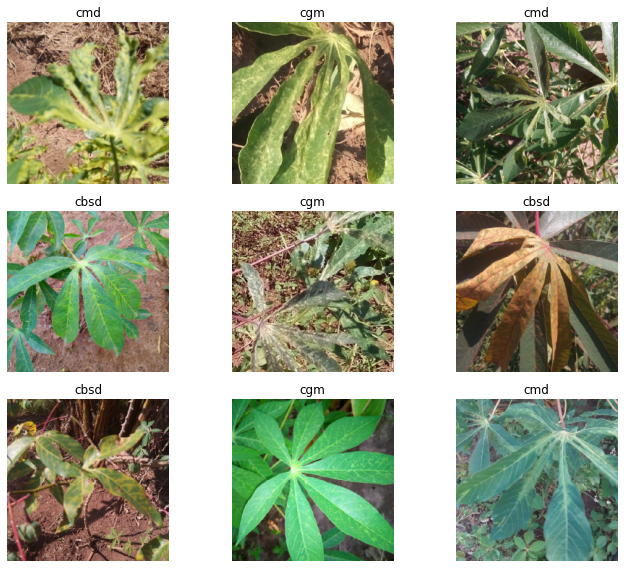

In [ ]:
data.show_batch(rows=3, figsize=(10,8), ds_type=DatasetType.Valid)

In [ ]:
## some important parameter
model_name = 'resnet50_New'
path_model = '/content/drive/My Drive/' +model_name


In [ ]:
## Let us define the learner 
model = vision.cnn_learner(data, models.resnet50, metrics = vision.accuracy, callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


The here is to find the best initial learning since since it has an important impact in the training model. We are lucky because FastAI provide already a dependencies to track the best lr. KKKKKKi


In [ ]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


The following plot we allow to better visualize the behavior of the learning rate. Nice right, Let me laught a bit kkkkkii

Min numerical gradient: 2.75E-04
Min loss divided by 10: 6.92E-03


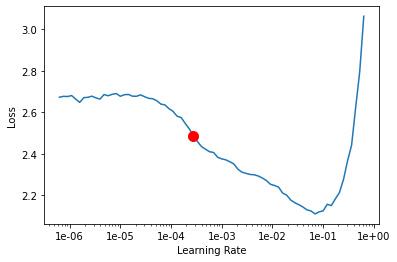

In [ ]:
model.recorder.plot(suggestion=True)

## **We train here our first model and save the result**

epoch,train_loss,valid_loss,accuracy,time
0,2.557047,1.884678,0.258179,02:13
1,2.165122,1.348037,0.503979,02:09
2,1.802318,1.093172,0.614500,02:08
3,1.590574,0.944823,0.672856,02:08
4,1.419002,0.901493,0.693192,02:07
5,1.306657,0.859945,0.703802,02:08
6,1.222798,0.802127,0.725906,02:08
7,1.168536,0.777879,0.735632,02:07
8,1.120574,0.758271,0.745358,02:07
9,1.074399,0.736411,0.759505,02:06


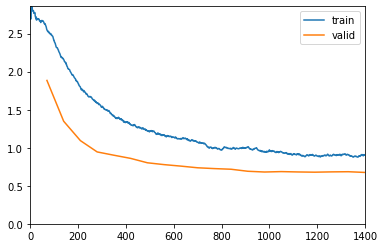

In [ ]:
lr = 1e-4
model.fit_one_cycle(20, slice(lr))
model.save(path_model+'_1')

## **Let us train our learner here and save the model in the provide directory**

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-06
Min loss divided by 10: 1.58E-05


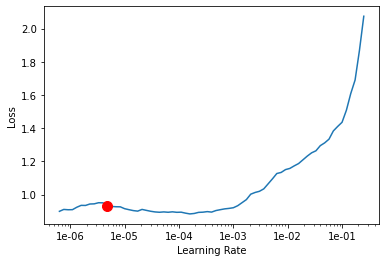

In [ ]:
model.unfreeze()
model.lr_find()
model.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.920078,0.670968,0.782493,02:11
1,0.885577,0.686537,0.784262,02:09
2,0.859224,0.675578,0.792219,02:08
3,0.816844,0.657745,0.808134,02:08
4,0.731010,0.673443,0.817860,02:08
5,0.640310,0.586581,0.827586,02:08
6,0.557384,0.547394,0.825818,02:09
7,0.510342,0.505728,0.846154,02:09
8,0.465271,0.536251,0.832891,02:09
9,0.435971,0.505855,0.846154,02:10


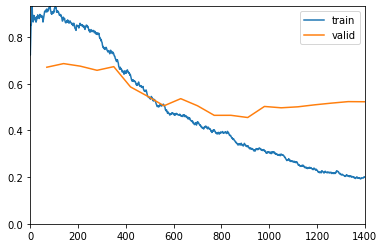

In [ ]:
model.fit_one_cycle(20, max_lr=slice(1e-5, 1e-3))

#save the model after training
model.save(path_model+'_2')

epoch,train_loss,valid_loss,accuracy,time
0,0.190866,0.511934,0.869142,02:11
1,0.204986,0.520086,0.871795,02:10
2,0.223283,0.517742,0.867374,02:08
3,0.227349,0.520555,0.870911,02:09
4,0.236505,0.583531,0.848806,02:08
5,0.219812,0.549121,0.854111,02:09
6,0.222927,0.568375,0.855880,02:08
7,0.216491,0.560042,0.862953,02:08
8,0.202369,0.538721,0.864721,02:08
9,0.210917,0.572596,0.860301,02:08


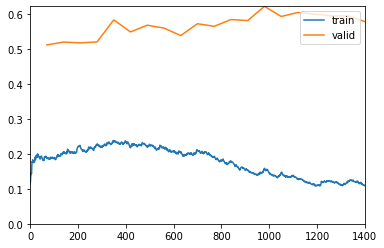

In [ ]:
model.fit_one_cycle(20 , max_lr=slice(1e-6, 1e-3))

model.save(path_model+'_3')

epoch,train_loss,valid_loss,accuracy,time
0,0.111092,0.599124,0.862069,02:16
1,0.115680,0.620278,0.863837,02:12
2,0.126569,0.619840,0.861185,02:11
3,0.139327,0.653552,0.854111,02:13
4,0.138296,0.679170,0.856764,02:13
5,0.149796,0.609104,0.868258,02:11
6,0.155548,0.615166,0.857648,02:12
7,0.152594,0.682248,0.850575,02:13
8,0.139902,0.667111,0.859416,02:13
9,0.130890,0.662991,0.861185,02:17


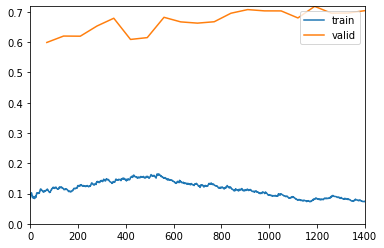

In [ ]:
model.load(path_model+'_3')
model.fit_one_cycle(20, max_lr=slice(1e-6, 1e-3))
model.save(path_model+'_4')

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 3.31E-07


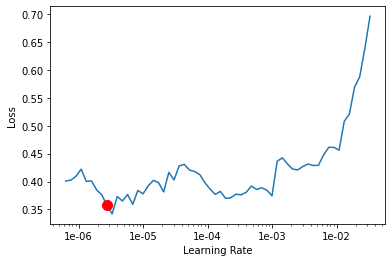

In [ ]:
data = (ImageList.from_folder('/content/train')
          .split_by_rand_pct()         
          .label_from_folder()
          .transform(transform, size=412)
          .add_test_folder('/content/test/0')
          .databunch(bs = 16)
          .normalize(imagenet_stats))

model = create_cnn(data, models.resnet50, metrics=[accuracy], callback_fns=ShowGraph)

model.load(path_model+'_3')
model.lr_find()
model.recorder.plot(suggestion=True)
lr =  model.recorder.min_grad_lr

epoch,train_loss,valid_loss,accuracy,time
0,0.412904,0.186486,0.947834,02:49
1,0.355972,0.193958,0.946065,02:52
2,0.432106,0.186863,0.945181,02:52
3,0.519472,0.182636,0.947834,02:51
4,0.450761,0.200210,0.941645,02:47
5,0.427418,0.179266,0.949602,02:42
6,0.410987,0.179039,0.951370,02:41
7,0.381692,0.183964,0.949602,02:40
8,0.445534,0.187206,0.954023,02:41
9,0.407311,0.193268,0.944297,02:40


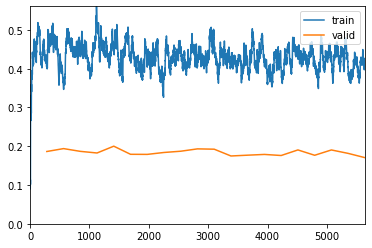

In [ ]:
model.fit_one_cycle(20, max_lr=slice(lr))
model.save(path_model+'_5')

In [ ]:
#model.load(path_model+'_3')

In [ ]:
#pred, _ = model.TTA(ds_type = fastai.basic_data.DatasetType.Test)

In [ ]:

# p, classe = pred.max(dim=1)
# class_labels = np.array(['cbb','cbsd','cgm','cmd','healthy'])
# pred_class = class_labels[classe]


In [ ]:
# filenames = list()
# for file in data.test_ds.items:
#   filenames.append(file.name)

In [ ]:
# import pandas as pd

# submission = pd.DataFrame.from_dict({'Category': pred_class, 'Id': filenames})

# submission


,Category,Id
0,cmd,test-img-2372.jpg
1,cmd,test-img-2618.jpg
2,cmd,test-img-2205.jpg
3,cmd,test-img-3488.jpg
4,cmd,test-img-3079.jpg
...,...,...
3769,cmd,test-img-155.jpg
3770,cmd,test-img-1377.jpg
3771,cbsd,test-img-3556.jpg
3772,cmd,test-img-3297.jpg


In [ ]:
# import pandas as pd
# compression_opts = dict(method='zip', archive_name='out.csv')  
# submission.to_csv('out.zip', index=False,compression=compression_opts)  

In [ ]:
#submission.to_csv('my_submission.csv', header = True, index = False)

#!kaggle competitions submit -c ammi-2020-convnets -f my_submission.csv -m 'Star Group'

# **Prediction**

In [ ]:
# prediction
preds,y = model.get_preds(ds_type=DatasetType.Test)

# **ExtraImages**
In this section, we gonna make use of the extraimages to inpawer our model in order to get a best accuracy.

In [ ]:
dataset = (ImageList.from_folder('/content/train')
                          .split_by_rand_pct()         
                          .label_from_folder()
                          .transform(transform, size=224)
                          .add_test_folder('/content/extraimages')
                          .databunch(bs = 32)
                          .normalize(imagenet_stats))


model.data = dataset
pred, _ = model.TTA(ds_type = fastai.basic_data.DatasetType.Test)
max_prob, classe = pred.max(dim=1)
class_labels = np.array(['cbb','cbsd','cgm','cmd','healthy'])
pred_labels = class_labels[classe]

##


In [ ]:
augmented = True
if augmented:
  files = list()
  for file in dataset.test_ds.items:
    files.append(file.name)
  i = 0
  for pro, classe, file in zip(max_prob, pred_labels, files):
    if pro > .90:
      shutil.copy("/content/extraimages/{}".format(file), "/content/train/{}/{}".format(classe, file))
      i += 1
  print(f'the number of data augmented is: {i}')


the number of data augmented is: 7056


In [ ]:
dataset1 = (ImageList.from_folder('/content/train')
                          .split_by_rand_pct()         
                          .label_from_folder()
                          .transform(transform, size=224)
                          .add_test_folder('/content/test/0')
                          .databunch(bs = 64)
                          .normalize(imagenet_stats))



/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 7.59E-04


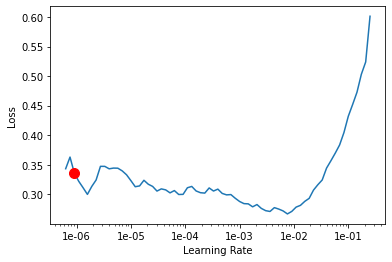

In [ ]:
model = create_cnn(dataset1, models.resnet50, metrics=[accuracy], callback_fns=ShowGraph)

model.load(path_model+'_5')
model.lr_find()
model.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.308439,0.161489,0.947286,04:49
1,0.304874,0.167901,0.947679,04:52
2,0.312323,0.135392,0.961841,05:01
3,0.287197,0.127089,0.964595,04:50
4,0.314724,0.158698,0.948859,04:43
5,0.297555,0.143989,0.956334,04:40
6,0.287377,0.125414,0.963021,04:39
7,0.274230,0.118855,0.966168,04:39
8,0.238995,0.120850,0.966168,04:39
9,0.264920,0.133197,0.960267,04:49


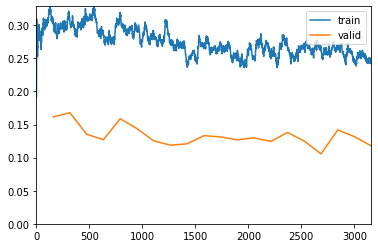

In [ ]:
lr =  model.recorder.min_grad_lr
model.fit_one_cycle(20, lr)

#save the model after training
model.save(path_model+'_6')

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-06
Min loss divided by 10: 1.91E-05


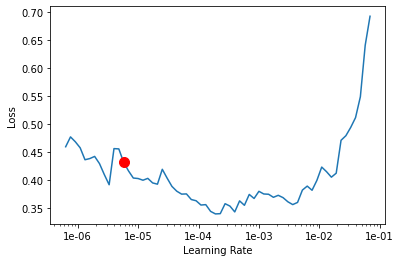

In [ ]:
data1 = (ImageList.from_folder('/content/train')
          .split_by_rand_pct()         
          .label_from_folder()
          .transform(transform, size=412)
          .add_test_folder('/content/test/0')
          .databunch(bs = 16)
          .normalize(imagenet_stats))

model = create_cnn(data1, models.resnet50, metrics=[accuracy], callback_fns=ShowGraph)

model.load(path_model+'_6')
model.lr_find()
model.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.343001,0.288314,0.910307,05:49
1,0.627475,0.909346,0.790323,05:46
2,0.583224,0.436593,0.858379,05:43
3,0.422316,0.475295,0.842644,05:40
4,0.456657,3.451717,0.860740,05:36
5,0.412488,0.366366,0.895751,05:35
6,0.346169,0.346375,0.905980,05:32
7,0.305012,0.299372,0.927223,05:33


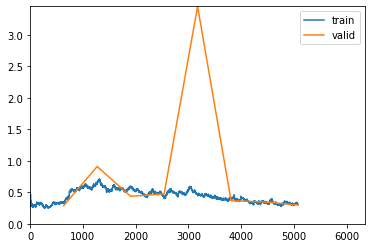

In [ ]:
model.fit_one_cycle(10, 1e-2)

#save the model after training
model.save(path_model+'_7')

In [ ]:
model.load(path_model+'_6')

In [ ]:
pred, _ = model.TTA(ds_type = fastai.basic_data.DatasetType.Test)

In [ ]:

p, classe = pred.max(dim=1)
class_labels = np.array(['cbb','cbsd','cgm','cmd','healthy'])
pred_class = class_labels[classe]


In [ ]:
filenames = list()
for file in data.test_ds.items:
  filenames.append(file.name)

In [ ]:
len(pred_class), len(filenames)

(3774, 3774)

In [ ]:
import pandas as pd

submission = pd.DataFrame.from_dict({'Category': pred_class, 'Id': filenames})

submission


,Category,Id
0,cmd,test-img-2372.jpg
1,cgm,test-img-2618.jpg
2,cmd,test-img-2205.jpg
3,cmd,test-img-3488.jpg
4,cmd,test-img-3079.jpg
...,...,...
3769,cmd,test-img-155.jpg
3770,cmd,test-img-1377.jpg
3771,cbsd,test-img-3556.jpg
3772,cmd,test-img-3297.jpg


In [ ]:
# import pandas as pd
# compression_opts = dict(method='zip', archive_name='out.csv')  
# submission.to_csv('out.zip', index=False,compression=compression_opts)  

In [ ]:
submission.to_csv('my_submission.csv', header = True, index = False)

!kaggle competitions submit -c ammi-2020-convnets -f my_submission.csv -m 'Star Group'

100% 81.8k/81.8k [00:23<00:00, 3.60kB/s]
Successfully submitted to Cassava Disease Classification